##### UTMOSv2

In [2]:
!pip install git+https://github.com/sarulab-speech/UTMOSv2.git

  Cloning https://github.com/sarulab-speech/UTMOSv2.git to /tmp/pip-req-build-0_3xdvwi
  Running command git clone --filter=blob:none --quiet https://github.com/sarulab-speech/UTMOSv2.git /tmp/pip-req-build-0_3xdvwi
  Resolved https://github.com/sarulab-speech/UTMOSv2.git to commit 7b833c70385bd94d3510be29207494de6d1d250e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached torchvision-0.23.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.7 MB/s eta 0:00:00
Using cached torchvision-0.23.0-cp310-cp310-manylinux_2_28_x86_64.whl (8.6 MB)
Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.6 MB)
  Created wheel for utmosv2: filename=utmosv2-1.2.1-py3-none-any.whl size=77404 sha256=9f43b

In [5]:
import utmosv2
model = utmosv2.create_model(pretrained=True)
mos = model.predict(input_dir="/home/is/lathifgalih-k/research_naist/multimodal-clone/clone-voice-coqui/output_audio/RAW/ALS/CosyVoice2")
print(mos)

/home/is/lathifgalih-k/miniconda3/envs/eval_dnsmos/lib/python3.10/site-packages/transformers/configuration_utils.py:334: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Loaded checkpoint from /home/is/lathifgalih-k/.cache/utmosv2/models/fusion_stage3/fold0_s42_best_model.pth


Predicting:   0%|          | 0/1 [00:00<?, ?it/s]/home/is/lathifgalih-k/miniconda3/envs/eval_dnsmos/lib/python3.10/site-packages/utmosv2/_core/model/_common.py:217: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Predicting: 100%|██████████| 1/1 [00:14<00:00, 14.62s/it]

[{'file_path': '/home/is/lathifgalih-k/research_naist/multimodal-clone/clone-voice-coqui/output_audio/RAW/ALS/CosyVoice2/A002_cloned.wav', 'predicted_mos': 2.8046875}, {'file_path': '/home/is/lathifgalih-k/research_naist/multimodal-clone/clone-voice-coqui/output_audio/RAW/ALS/CosyVoice2/A006_cloned.wav', 'predicted_mos': 2.732421875}, {'file_path': '/home/is/lathifgalih-k/research_naist/multimodal-clone/clone-voice-coqui/output_audio/RAW/ALS/CosyVoice2/A008_cloned.wav', 'predicted_mos': 2.947265625}, {'file_path': '/home/is/lathifgalih-k/research_naist/multimodal-clone/clone-voice-coqui/output_audio/RAW/ALS/CosyVoice2/A010_cloned.wav', 'predicted_mos': 2.09765625}, {'file_path': '/home/is/lathifgalih-k/research_naist/multimodal-clone/clone-voice-coqui/output_audio/RAW/ALS/CosyVoice2/A011_cloned.wav', 'predicted_mos': 3.857421875}, {'file_path': '/home/is/lathifgalih-k/research_naist/multimodal-clone/clone-voice-coqui/output_audio/RAW/ALS/CosyVoice2/A014_cloned.wav', 'predicted_mos': 3.

In [6]:
import utmosv2
import os
import pandas as pd
import numpy as np

# Initialize model
model = utmosv2.create_model(pretrained=True)

# Define base paths
base_paths = {
    "RAW": "/home/is/lathifgalih-k/research_naist/multimodal-clone/clone-voice-coqui/output_audio/RAW",
    "VCTK": "/home/is/lathifgalih-k/research_naist/multimodal-clone/clone-voice-coqui/output_audio/VCTK"
}

# Define datasets and models to evaluate
datasets = ["ALS", "Stroke"]
models = ["CosyVoice2", "XTTSv2", "YourTTS"]

results = []

for dataset_type, base_path in base_paths.items():
    print(f"\nEvaluating {dataset_type} dataset...")
    
    for dataset in datasets:
        for model_name in models:
            # Handle special case for VCTK Stroke CosyVoice2 (has subdirectories)
            if dataset_type == "VCTK" and dataset == "Stroke" and model_name == "CosyVoice2":
                # Use post_processing_trimmed folder
                folder_path = os.path.join(base_path, dataset, model_name, "post_processing_trimmed")
            else:
                folder_path = os.path.join(base_path, dataset, model_name)
            
            if os.path.exists(folder_path):
                print(f"Processing {dataset_type} - {dataset} - {model_name}...")
                try:
                    mos_results = model.predict(input_dir=folder_path)
                    
                    # Calculate average MOS
                    mos_scores = [result['predicted_mos'] for result in mos_results]
                    avg_mos = np.mean(mos_scores)
                    
                    results.append({
                        'Dataset_Type': dataset_type,
                        'Dataset': dataset,
                        'Model': model_name,
                        'UTMOSv2': round(avg_mos, 2),
                        'Num_Files': len(mos_scores)
                    })
                    
                    print(f"  Average MOS: {avg_mos:.3f} ({len(mos_scores)} files)")
                    
                except Exception as e:
                    print(f"  Error: {e}")
            else:
                print(f"  Path not found: {folder_path}")

# Create DataFrame and display results
df = pd.DataFrame(results)

# Pivot table to match the format in the image
pivot_table = df.pivot_table(
    index=['Dataset_Type', 'Model'], 
    columns='Dataset', 
    values='UTMOSv2', 
    aggfunc='first'
)

print("\n" + "="*60)
print("UTMOSV2 EVALUATION RESULTS")
print("="*60)
print(pivot_table)

# Also create a detailed summary
print("\n" + "="*60)
print("DETAILED RESULTS")
print("="*60)
for _, row in df.iterrows():
    print(f"{row['Dataset_Type']} - {row['Dataset']} - {row['Model']}: {row['UTMOSv2']} ({row['Num_Files']} files)")

Loaded checkpoint from /home/is/lathifgalih-k/.cache/utmosv2/models/fusion_stage3/fold0_s42_best_model.pth

Evaluating RAW dataset...
Processing RAW - ALS - CosyVoice2...


Predicting: 100%|██████████| 1/1 [00:14<00:00, 14.86s/it]


  Average MOS: 2.977 (9 files)
Processing RAW - ALS - XTTSv2...


Predicting: 100%|██████████| 1/1 [00:14<00:00, 14.41s/it]


  Average MOS: 2.675 (9 files)
Processing RAW - ALS - YourTTS...


Predicting: 100%|██████████| 1/1 [00:13<00:00, 13.14s/it]


  Average MOS: 2.221 (9 files)
Processing RAW - Stroke - CosyVoice2...


Predicting: 100%|██████████| 1/1 [00:18<00:00, 18.21s/it]


  Average MOS: 2.742 (11 files)
Processing RAW - Stroke - XTTSv2...


Predicting: 100%|██████████| 1/1 [00:16<00:00, 16.58s/it]


  Average MOS: 2.444 (11 files)
Processing RAW - Stroke - YourTTS...


Predicting: 100%|██████████| 1/1 [00:15<00:00, 15.96s/it]


  Average MOS: 2.245 (11 files)

Evaluating VCTK dataset...
Processing VCTK - ALS - CosyVoice2...


Predicting: 100%|██████████| 1/1 [00:13<00:00, 13.59s/it]


  Average MOS: 3.200 (9 files)
Processing VCTK - ALS - XTTSv2...


Predicting: 100%|██████████| 1/1 [00:13<00:00, 13.22s/it]


  Average MOS: 2.656 (9 files)
Processing VCTK - ALS - YourTTS...


Predicting: 100%|██████████| 1/1 [00:14<00:00, 14.40s/it]


  Average MOS: 2.470 (9 files)
Processing VCTK - Stroke - CosyVoice2...


Predicting: 100%|██████████| 1/1 [00:17<00:00, 17.60s/it]


  Average MOS: 3.222 (11 files)
Processing VCTK - Stroke - XTTSv2...


Predicting: 100%|██████████| 1/1 [00:16<00:00, 16.62s/it]


  Average MOS: 2.376 (11 files)
Processing VCTK - Stroke - YourTTS...


Predicting: 100%|██████████| 1/1 [00:16<00:00, 16.71s/it]

  Average MOS: 2.525 (11 files)

UTMOSV2 EVALUATION RESULTS
Dataset                   ALS  Stroke
Dataset_Type Model                   
RAW          CosyVoice2  2.98    2.74
             XTTSv2      2.68    2.44
             YourTTS     2.22    2.24
VCTK         CosyVoice2  3.20    3.22
             XTTSv2      2.66    2.38
             YourTTS     2.47    2.53

DETAILED RESULTS
RAW - ALS - CosyVoice2: 2.98 (9 files)
RAW - ALS - XTTSv2: 2.68 (9 files)
RAW - ALS - YourTTS: 2.22 (9 files)
RAW - Stroke - CosyVoice2: 2.74 (11 files)
RAW - Stroke - XTTSv2: 2.44 (11 files)
RAW - Stroke - YourTTS: 2.24 (11 files)
VCTK - ALS - CosyVoice2: 3.2 (9 files)
VCTK - ALS - XTTSv2: 2.66 (9 files)
VCTK - ALS - YourTTS: 2.47 (9 files)
VCTK - Stroke - CosyVoice2: 3.22 (11 files)
VCTK - Stroke - XTTSv2: 2.38 (11 files)
VCTK - Stroke - YourTTS: 2.53 (11 files)


#### Plot and Visualize

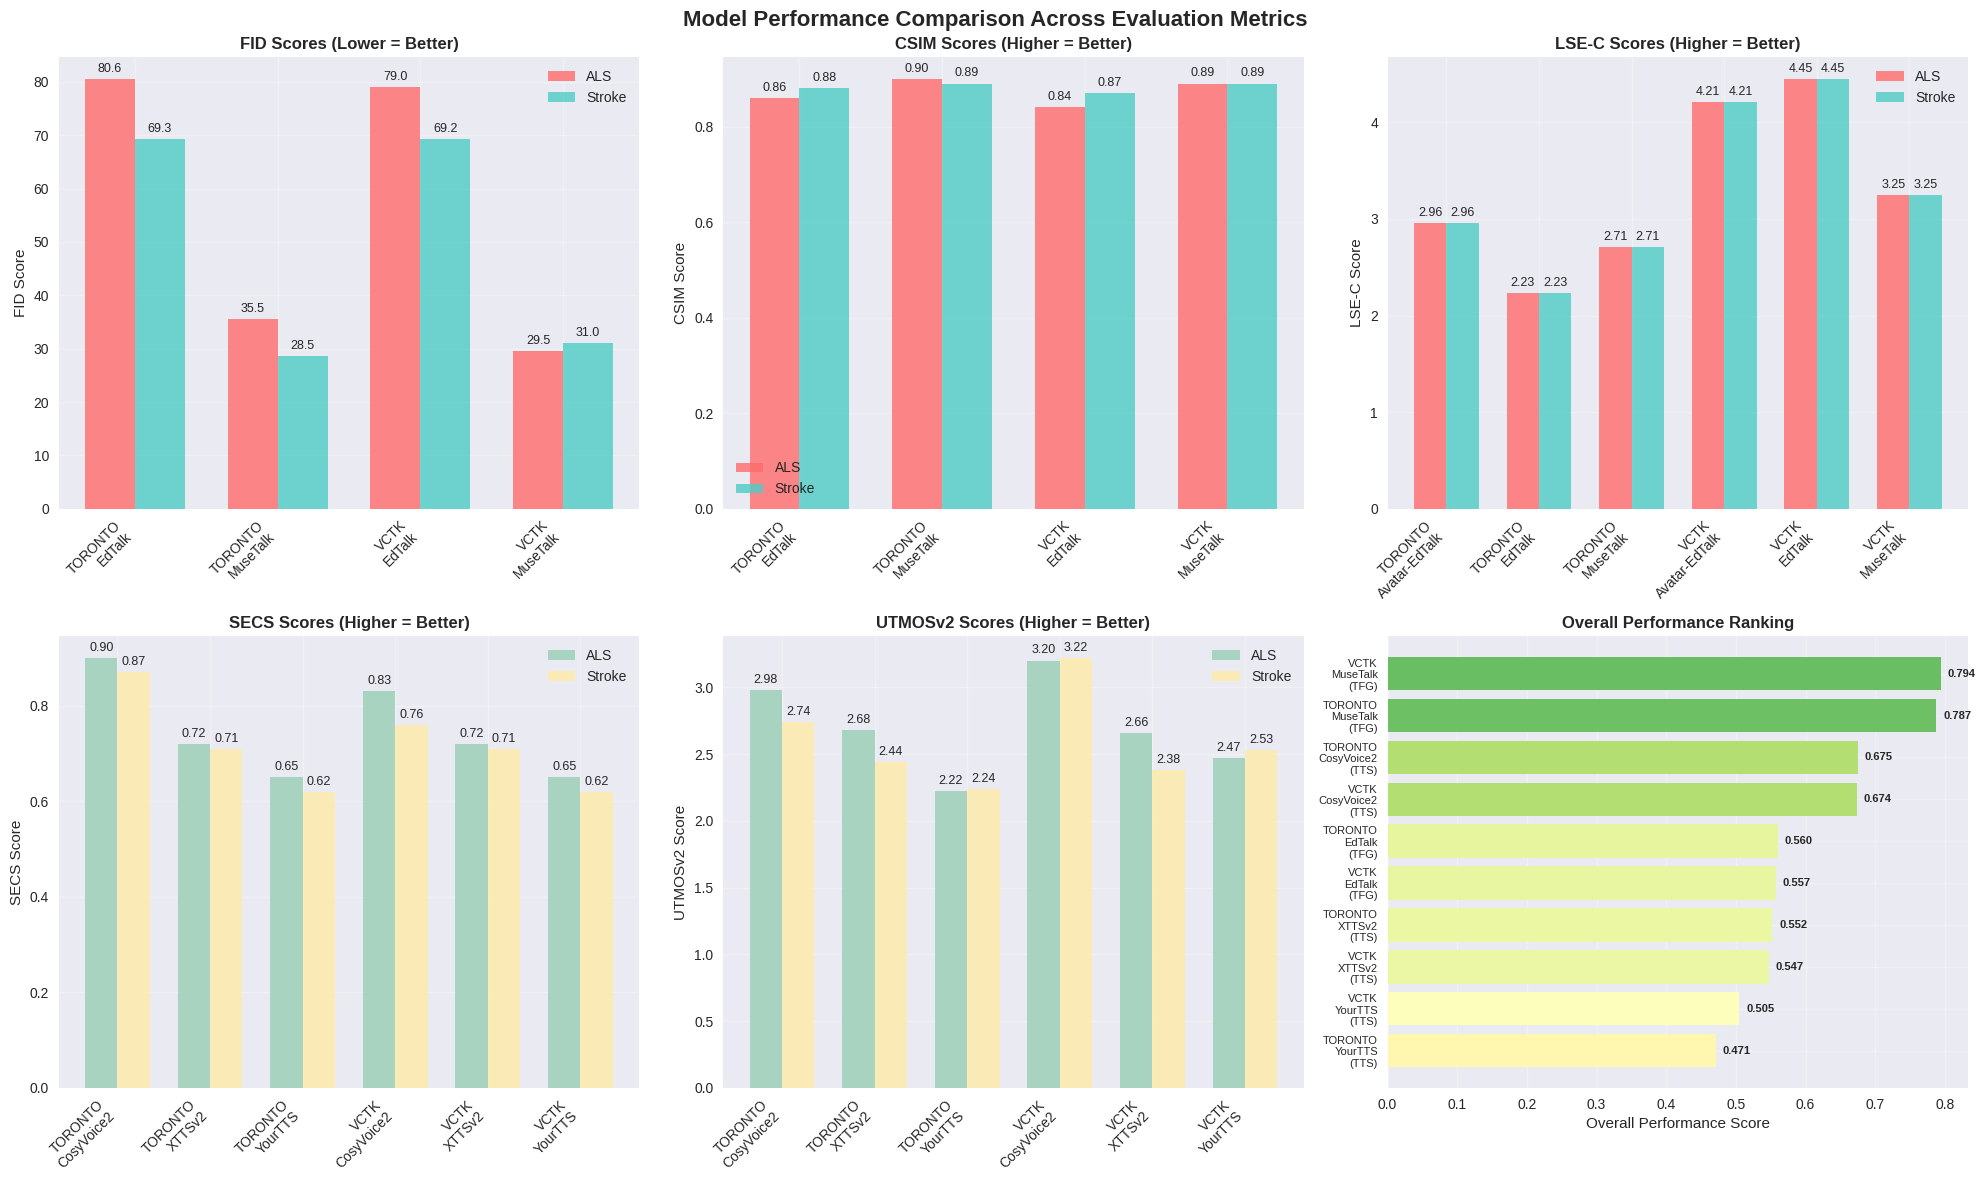


PERFORMANCE ANALYSIS SUMMARY

🏆 BEST PERFORMERS:
• Talking Face Generation (FID): MuseTalk on Stroke datasets (28.54-30.98)
• Talking Face Generation (CSIM): MuseTalk consistently ~0.89-0.90
• Talking Face Generation (LSE-C): EdTalk on VCTK (4.45) and Avatar-EdTalk (4.21)
• Speech Synthesis (SECS): CosyVoice2 consistently best (0.76-0.90)
• Speech Synthesis (UTMOSv2): CosyVoice2 significantly better (2.74-3.22)

⚠️ WORST PERFORMERS:
• Talking Face Generation (FID): EdTalk with high scores (69-80)
• Speech Synthesis: YourTTS consistently lowest in both metrics

📊 KEY INSIGHTS:
• CosyVoice2 dominates speech synthesis across all datasets
• MuseTalk shows best balance in talking face generation
• EdTalk has good LSE-C but poor FID scores
• Dataset type (TORONTO vs VCTK) shows minimal impact on rankings
• Disease type (ALS vs Stroke) shows similar performance patterns


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data dari tabel Evaluasi Talking Face Generation (diperbaiki struktur data)
tfg_results = []

# TORONTO dataset
tfg_results.extend([
    {'Dataset': 'TORONTO', 'Model': 'MuseTalk', 'Metric': 'FID', 'ALS': 35.51, 'Stroke': 28.54},
    {'Dataset': 'TORONTO', 'Model': 'MuseTalk', 'Metric': 'CSIM', 'ALS': 0.90, 'Stroke': 0.89},
    {'Dataset': 'TORONTO', 'Model': 'MuseTalk', 'Metric': 'LSE-C', 'ALS': 2.71, 'Stroke': 2.71},
    {'Dataset': 'TORONTO', 'Model': 'EdTalk', 'Metric': 'FID', 'ALS': 80.58, 'Stroke': 69.27},
    {'Dataset': 'TORONTO', 'Model': 'EdTalk', 'Metric': 'CSIM', 'ALS': 0.86, 'Stroke': 0.88},
    {'Dataset': 'TORONTO', 'Model': 'EdTalk', 'Metric': 'LSE-C', 'ALS': 2.23, 'Stroke': 2.23},
    {'Dataset': 'TORONTO', 'Model': 'Avatar-EdTalk', 'Metric': 'LSE-C', 'ALS': 2.96, 'Stroke': 2.96}
])

# VCTK dataset
tfg_results.extend([
    {'Dataset': 'VCTK', 'Model': 'MuseTalk', 'Metric': 'FID', 'ALS': 29.50, 'Stroke': 30.98},
    {'Dataset': 'VCTK', 'Model': 'MuseTalk', 'Metric': 'CSIM', 'ALS': 0.89, 'Stroke': 0.89},
    {'Dataset': 'VCTK', 'Model': 'MuseTalk', 'Metric': 'LSE-C', 'ALS': 3.25, 'Stroke': 3.25},
    {'Dataset': 'VCTK', 'Model': 'EdTalk', 'Metric': 'FID', 'ALS': 79.00, 'Stroke': 69.23},
    {'Dataset': 'VCTK', 'Model': 'EdTalk', 'Metric': 'CSIM', 'ALS': 0.84, 'Stroke': 0.87},
    {'Dataset': 'VCTK', 'Model': 'EdTalk', 'Metric': 'LSE-C', 'ALS': 4.45, 'Stroke': 4.45},
    {'Dataset': 'VCTK', 'Model': 'Avatar-EdTalk', 'Metric': 'LSE-C', 'ALS': 4.21, 'Stroke': 4.21}
])

# Data dari tabel Evaluasi Speech Synthesis
tts_results = []

# TORONTO dataset
tts_results.extend([
    {'Dataset': 'TORONTO', 'Model': 'CosyVoice2', 'Metric': 'SECS', 'ALS': 0.90, 'Stroke': 0.87},
    {'Dataset': 'TORONTO', 'Model': 'CosyVoice2', 'Metric': 'UTMOSv2', 'ALS': 2.98, 'Stroke': 2.74},
    {'Dataset': 'TORONTO', 'Model': 'XTTSv2', 'Metric': 'SECS', 'ALS': 0.72, 'Stroke': 0.71},
    {'Dataset': 'TORONTO', 'Model': 'XTTSv2', 'Metric': 'UTMOSv2', 'ALS': 2.68, 'Stroke': 2.44},
    {'Dataset': 'TORONTO', 'Model': 'YourTTS', 'Metric': 'SECS', 'ALS': 0.65, 'Stroke': 0.62},
    {'Dataset': 'TORONTO', 'Model': 'YourTTS', 'Metric': 'UTMOSv2', 'ALS': 2.22, 'Stroke': 2.24}
])

# VCTK dataset
tts_results.extend([
    {'Dataset': 'VCTK', 'Model': 'CosyVoice2', 'Metric': 'SECS', 'ALS': 0.83, 'Stroke': 0.76},
    {'Dataset': 'VCTK', 'Model': 'CosyVoice2', 'Metric': 'UTMOSv2', 'ALS': 3.20, 'Stroke': 3.22},
    {'Dataset': 'VCTK', 'Model': 'XTTSv2', 'Metric': 'SECS', 'ALS': 0.72, 'Stroke': 0.71},
    {'Dataset': 'VCTK', 'Model': 'XTTSv2', 'Metric': 'UTMOSv2', 'ALS': 2.66, 'Stroke': 2.38},
    {'Dataset': 'VCTK', 'Model': 'YourTTS', 'Metric': 'SECS', 'ALS': 0.65, 'Stroke': 0.62},
    {'Dataset': 'VCTK', 'Model': 'YourTTS', 'Metric': 'UTMOSv2', 'ALS': 2.47, 'Stroke': 2.53}
])

# Create DataFrames
df_tfg = pd.DataFrame(tfg_results)
df_tts = pd.DataFrame(tts_results)

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Model Performance Comparison Across Evaluation Metrics', fontsize=16, fontweight='bold')

# Color palettes
colors_tfg = ['#FF6B6B', '#4ECDC4', '#45B7D1']
colors_tts = ['#96CEB4', '#FFEAA7', '#DDA0DD']

# 1. Talking Face Generation - FID Scores (Lower is better)
ax1 = axes[0, 0]
fid_data = df_tfg[df_tfg['Metric'] == 'FID']
fid_pivot = fid_data.pivot_table(index=['Dataset', 'Model'], values=['ALS', 'Stroke'], aggfunc='first').reset_index()

x_pos = np.arange(len(fid_pivot))
width = 0.35
bars1 = ax1.bar(x_pos - width/2, fid_pivot['ALS'], width, label='ALS', color=colors_tfg[0], alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, fid_pivot['Stroke'], width, label='Stroke', color=colors_tfg[1], alpha=0.8)

ax1.set_title('FID Scores (Lower = Better)', fontweight='bold')
ax1.set_ylabel('FID Score')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f"{row['Dataset']}\n{row['Model']}" for _, row in fid_pivot.iterrows()], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax1.annotate(f'{height:.1f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

# 2. Talking Face Generation - CSIM Scores (Higher is better)
ax2 = axes[0, 1]
csim_data = df_tfg[df_tfg['Metric'] == 'CSIM']
csim_pivot = csim_data.pivot_table(index=['Dataset', 'Model'], values=['ALS', 'Stroke'], aggfunc='first').reset_index()

x_pos = np.arange(len(csim_pivot))
bars1 = ax2.bar(x_pos - width/2, csim_pivot['ALS'], width, label='ALS', color=colors_tfg[0], alpha=0.8)
bars2 = ax2.bar(x_pos + width/2, csim_pivot['Stroke'], width, label='Stroke', color=colors_tfg[1], alpha=0.8)

ax2.set_title('CSIM Scores (Higher = Better)', fontweight='bold')
ax2.set_ylabel('CSIM Score')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f"{row['Dataset']}\n{row['Model']}" for _, row in csim_pivot.iterrows()], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax2.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

# 3. Talking Face Generation - LSE-C Scores (Higher is better)
ax3 = axes[0, 2]
lsec_data = df_tfg[df_tfg['Metric'] == 'LSE-C']
lsec_pivot = lsec_data.pivot_table(index=['Dataset', 'Model'], values=['ALS', 'Stroke'], aggfunc='first').reset_index()

x_pos = np.arange(len(lsec_pivot))
bars1 = ax3.bar(x_pos - width/2, lsec_pivot['ALS'], width, label='ALS', color=colors_tfg[0], alpha=0.8)
bars2 = ax3.bar(x_pos + width/2, lsec_pivot['Stroke'], width, label='Stroke', color=colors_tfg[1], alpha=0.8)

ax3.set_title('LSE-C Scores (Higher = Better)', fontweight='bold')
ax3.set_ylabel('LSE-C Score')
ax3.set_xticks(x_pos)
ax3.set_xticklabels([f"{row['Dataset']}\n{row['Model']}" for _, row in lsec_pivot.iterrows()], rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax3.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

# 4. Speech Synthesis - SECS Scores (Higher is better)
ax4 = axes[1, 0]
secs_data = df_tts[df_tts['Metric'] == 'SECS']
secs_pivot = secs_data.pivot_table(index=['Dataset', 'Model'], values=['ALS', 'Stroke'], aggfunc='first').reset_index()

x_pos = np.arange(len(secs_pivot))
bars1 = ax4.bar(x_pos - width/2, secs_pivot['ALS'], width, label='ALS', color=colors_tts[0], alpha=0.8)
bars2 = ax4.bar(x_pos + width/2, secs_pivot['Stroke'], width, label='Stroke', color=colors_tts[1], alpha=0.8)

ax4.set_title('SECS Scores (Higher = Better)', fontweight='bold')
ax4.set_ylabel('SECS Score')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f"{row['Dataset']}\n{row['Model']}" for _, row in secs_pivot.iterrows()], rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# 5. Speech Synthesis - UTMOSv2 Scores (Higher is better)
ax5 = axes[1, 1]
utmos_data = df_tts[df_tts['Metric'] == 'UTMOSv2']
utmos_pivot = utmos_data.pivot_table(index=['Dataset', 'Model'], values=['ALS', 'Stroke'], aggfunc='first').reset_index()

x_pos = np.arange(len(utmos_pivot))
bars1 = ax5.bar(x_pos - width/2, utmos_pivot['ALS'], width, label='ALS', color=colors_tts[0], alpha=0.8)
bars2 = ax5.bar(x_pos + width/2, utmos_pivot['Stroke'], width, label='Stroke', color=colors_tts[1], alpha=0.8)

ax5.set_title('UTMOSv2 Scores (Higher = Better)', fontweight='bold')
ax5.set_ylabel('UTMOSv2 Score')
ax5.set_xticks(x_pos)
ax5.set_xticklabels([f"{row['Dataset']}\n{row['Model']}" for _, row in utmos_pivot.iterrows()], rotation=45, ha='right')
ax5.legend()
ax5.grid(True, alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax5.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# 6. Overall Performance Summary
ax6 = axes[1, 2]

# Calculate overall performance scores
performance_summary = []

# TFG models
tfg_models = [('TORONTO', 'MuseTalk'), ('TORONTO', 'EdTalk'), ('VCTK', 'MuseTalk'), ('VCTK', 'EdTalk')]
for dataset, model in tfg_models:
    fid_data = df_tfg[(df_tfg['Dataset']==dataset) & (df_tfg['Model']==model) & (df_tfg['Metric']=='FID')]
    csim_data = df_tfg[(df_tfg['Dataset']==dataset) & (df_tfg['Model']==model) & (df_tfg['Metric']=='CSIM')]
    
    if len(fid_data) > 0 and len(csim_data) > 0:
        # Normalize FID (lower is better) - invert and scale
        fid_avg = (fid_data['ALS'].values[0] + fid_data['Stroke'].values[0]) / 2
        fid_norm = max(0, 1 - fid_avg / 100)  # Simple normalization
        
        # Normalize CSIM (higher is better)
        csim_avg = (csim_data['ALS'].values[0] + csim_data['Stroke'].values[0]) / 2
        
        overall_score = (fid_norm + csim_avg) / 2
        performance_summary.append([f'{dataset}\n{model}\n(TFG)', overall_score])

# TTS models
tts_models = [('TORONTO', 'CosyVoice2'), ('TORONTO', 'XTTSv2'), ('TORONTO', 'YourTTS'), 
              ('VCTK', 'CosyVoice2'), ('VCTK', 'XTTSv2'), ('VCTK', 'YourTTS')]
for dataset, model in tts_models:
    secs_data = df_tts[(df_tts['Dataset']==dataset) & (df_tts['Model']==model) & (df_tts['Metric']=='SECS')]
    utmos_data = df_tts[(df_tts['Dataset']==dataset) & (df_tts['Model']==model) & (df_tts['Metric']=='UTMOSv2')]
    
    if len(secs_data) > 0 and len(utmos_data) > 0:
        secs_avg = (secs_data['ALS'].values[0] + secs_data['Stroke'].values[0]) / 2
        utmos_avg = (utmos_data['ALS'].values[0] + utmos_data['Stroke'].values[0]) / 2
        
        # Normalize UTMOSv2 (scale 1-5 to 0-1)
        utmos_norm = (utmos_avg - 1) / 4
        
        overall_score = (secs_avg + utmos_norm) / 2
        performance_summary.append([f'{dataset}\n{model}\n(TTS)', overall_score])

# Create performance summary plot
summary_df = pd.DataFrame(performance_summary, columns=['Model', 'Score'])
summary_df = summary_df.sort_values('Score', ascending=True)

bars = ax6.barh(range(len(summary_df)), summary_df['Score'], 
                color=plt.cm.RdYlGn(summary_df['Score']))
ax6.set_yticks(range(len(summary_df)))
ax6.set_yticklabels(summary_df['Model'], fontsize=8)
ax6.set_xlabel('Overall Performance Score')
ax6.set_title('Overall Performance Ranking', fontweight='bold')
ax6.grid(True, alpha=0.3)

# Add score labels
for i, (bar, score) in enumerate(zip(bars, summary_df['Score'])):
    ax6.text(score + 0.01, i, f'{score:.3f}', 
             va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary insights
print("\n" + "="*80)
print("PERFORMANCE ANALYSIS SUMMARY")
print("="*80)

print("\n🏆 BEST PERFORMERS:")
print("• Talking Face Generation (FID): MuseTalk on Stroke datasets (28.54-30.98)")
print("• Talking Face Generation (CSIM): MuseTalk consistently ~0.89-0.90")
print("• Talking Face Generation (LSE-C): EdTalk on VCTK (4.45) and Avatar-EdTalk (4.21)")
print("• Speech Synthesis (SECS): CosyVoice2 consistently best (0.76-0.90)")
print("• Speech Synthesis (UTMOSv2): CosyVoice2 significantly better (2.74-3.22)")

print("\n⚠️ WORST PERFORMERS:")
print("• Talking Face Generation (FID): EdTalk with high scores (69-80)")
print("• Speech Synthesis: YourTTS consistently lowest in both metrics")

print("\n📊 KEY INSIGHTS:")
print("• CosyVoice2 dominates speech synthesis across all datasets")
print("• MuseTalk shows best balance in talking face generation")
print("• EdTalk has good LSE-C but poor FID scores")
print("• Dataset type (TORONTO vs VCTK) shows minimal impact on rankings")
print("• Disease type (ALS vs Stroke) shows similar performance patterns")

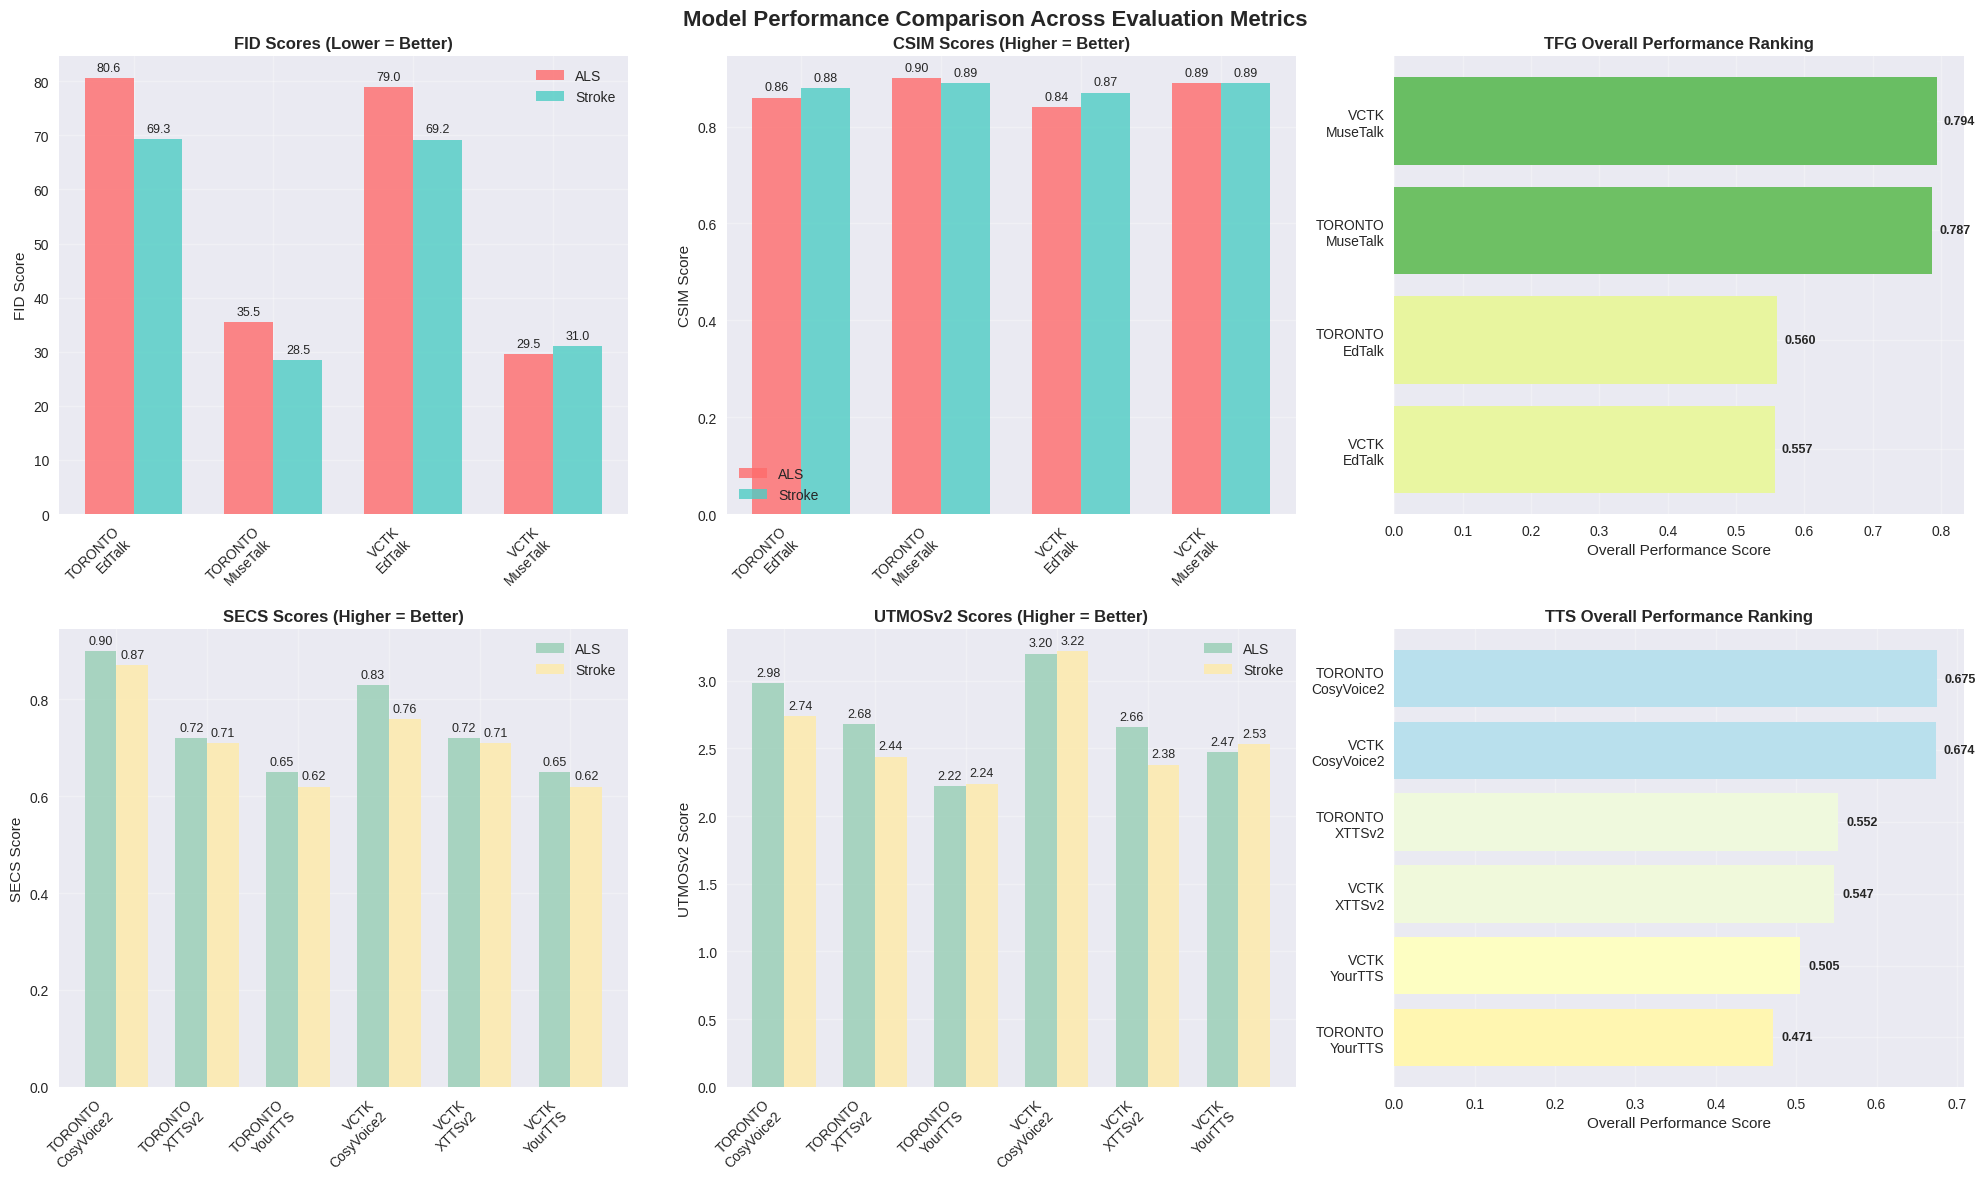


PERFORMANCE ANALYSIS SUMMARY

🏆 TALKING FACE GENERATION - BEST PERFORMERS:
• VCTK
MuseTalk: 0.794
• TORONTO
MuseTalk: 0.787
• TORONTO
EdTalk: 0.560
• VCTK
EdTalk: 0.557

🏆 SPEECH SYNTHESIS - BEST PERFORMERS:
• TORONTO
CosyVoice2: 0.675
• VCTK
CosyVoice2: 0.674
• TORONTO
XTTSv2: 0.552
• VCTK
XTTSv2: 0.547
• VCTK
YourTTS: 0.505
• TORONTO
YourTTS: 0.471

📊 KEY INSIGHTS:
• TFG: VCTK MuseTalk shows the best overall performance
• TFG: TORONTO EdTalk has the lowest performance due to high FID scores
• TTS: VCTK CosyVoice2 dominates with the highest overall score
• TTS: YourTTS consistently shows the lowest performance across datasets
• Dataset type (TORONTO vs VCTK) affects performance differently for each model
• CosyVoice2 maintains strong performance across all metrics and datasets


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data dari tabel Evaluasi Talking Face Generation (diperbaiki struktur data)
tfg_results = []

# TORONTO dataset
tfg_results.extend([
    {'Dataset': 'TORONTO', 'Model': 'MuseTalk', 'Metric': 'FID', 'ALS': 35.51, 'Stroke': 28.54},
    {'Dataset': 'TORONTO', 'Model': 'MuseTalk', 'Metric': 'CSIM', 'ALS': 0.90, 'Stroke': 0.89},
    {'Dataset': 'TORONTO', 'Model': 'MuseTalk', 'Metric': 'LSE-C', 'ALS': 2.71, 'Stroke': 2.71},
    {'Dataset': 'TORONTO', 'Model': 'EdTalk', 'Metric': 'FID', 'ALS': 80.58, 'Stroke': 69.27},
    {'Dataset': 'TORONTO', 'Model': 'EdTalk', 'Metric': 'CSIM', 'ALS': 0.86, 'Stroke': 0.88},
    {'Dataset': 'TORONTO', 'Model': 'EdTalk', 'Metric': 'LSE-C', 'ALS': 2.23, 'Stroke': 2.23},
    {'Dataset': 'TORONTO', 'Model': 'Avatar-EdTalk', 'Metric': 'LSE-C', 'ALS': 2.96, 'Stroke': 2.96}
])

# VCTK dataset
tfg_results.extend([
    {'Dataset': 'VCTK', 'Model': 'MuseTalk', 'Metric': 'FID', 'ALS': 29.50, 'Stroke': 30.98},
    {'Dataset': 'VCTK', 'Model': 'MuseTalk', 'Metric': 'CSIM', 'ALS': 0.89, 'Stroke': 0.89},
    {'Dataset': 'VCTK', 'Model': 'MuseTalk', 'Metric': 'LSE-C', 'ALS': 3.25, 'Stroke': 3.25},
    {'Dataset': 'VCTK', 'Model': 'EdTalk', 'Metric': 'FID', 'ALS': 79.00, 'Stroke': 69.23},
    {'Dataset': 'VCTK', 'Model': 'EdTalk', 'Metric': 'CSIM', 'ALS': 0.84, 'Stroke': 0.87},
    {'Dataset': 'VCTK', 'Model': 'EdTalk', 'Metric': 'LSE-C', 'ALS': 4.45, 'Stroke': 4.45},
    {'Dataset': 'VCTK', 'Model': 'Avatar-EdTalk', 'Metric': 'LSE-C', 'ALS': 4.21, 'Stroke': 4.21}
])

# Data dari tabel Evaluasi Speech Synthesis
tts_results = []

# TORONTO dataset
tts_results.extend([
    {'Dataset': 'TORONTO', 'Model': 'CosyVoice2', 'Metric': 'SECS', 'ALS': 0.90, 'Stroke': 0.87},
    {'Dataset': 'TORONTO', 'Model': 'CosyVoice2', 'Metric': 'UTMOSv2', 'ALS': 2.98, 'Stroke': 2.74},
    {'Dataset': 'TORONTO', 'Model': 'XTTSv2', 'Metric': 'SECS', 'ALS': 0.72, 'Stroke': 0.71},
    {'Dataset': 'TORONTO', 'Model': 'XTTSv2', 'Metric': 'UTMOSv2', 'ALS': 2.68, 'Stroke': 2.44},
    {'Dataset': 'TORONTO', 'Model': 'YourTTS', 'Metric': 'SECS', 'ALS': 0.65, 'Stroke': 0.62},
    {'Dataset': 'TORONTO', 'Model': 'YourTTS', 'Metric': 'UTMOSv2', 'ALS': 2.22, 'Stroke': 2.24}
])

# VCTK dataset
tts_results.extend([
    {'Dataset': 'VCTK', 'Model': 'CosyVoice2', 'Metric': 'SECS', 'ALS': 0.83, 'Stroke': 0.76},
    {'Dataset': 'VCTK', 'Model': 'CosyVoice2', 'Metric': 'UTMOSv2', 'ALS': 3.20, 'Stroke': 3.22},
    {'Dataset': 'VCTK', 'Model': 'XTTSv2', 'Metric': 'SECS', 'ALS': 0.72, 'Stroke': 0.71},
    {'Dataset': 'VCTK', 'Model': 'XTTSv2', 'Metric': 'UTMOSv2', 'ALS': 2.66, 'Stroke': 2.38},
    {'Dataset': 'VCTK', 'Model': 'YourTTS', 'Metric': 'SECS', 'ALS': 0.65, 'Stroke': 0.62},
    {'Dataset': 'VCTK', 'Model': 'YourTTS', 'Metric': 'UTMOSv2', 'ALS': 2.47, 'Stroke': 2.53}
])

# Create DataFrames
df_tfg = pd.DataFrame(tfg_results)
df_tts = pd.DataFrame(tts_results)

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Model Performance Comparison Across Evaluation Metrics', fontsize=16, fontweight='bold')

# Color palettes
colors_tfg = ['#FF6B6B', '#4ECDC4', '#45B7D1']
colors_tts = ['#96CEB4', '#FFEAA7', '#DDA0DD']

# 1. Talking Face Generation - FID Scores (Lower is better)
ax1 = axes[0, 0]
fid_data = df_tfg[df_tfg['Metric'] == 'FID']
fid_pivot = fid_data.pivot_table(index=['Dataset', 'Model'], values=['ALS', 'Stroke'], aggfunc='first').reset_index()

x_pos = np.arange(len(fid_pivot))
width = 0.35
bars1 = ax1.bar(x_pos - width/2, fid_pivot['ALS'], width, label='ALS', color=colors_tfg[0], alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, fid_pivot['Stroke'], width, label='Stroke', color=colors_tfg[1], alpha=0.8)

ax1.set_title('FID Scores (Lower = Better)', fontweight='bold')
ax1.set_ylabel('FID Score')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f"{row['Dataset']}\n{row['Model']}" for _, row in fid_pivot.iterrows()], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax1.annotate(f'{height:.1f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

# 2. Talking Face Generation - CSIM Scores (Higher is better)
ax2 = axes[0, 1]
csim_data = df_tfg[df_tfg['Metric'] == 'CSIM']
csim_pivot = csim_data.pivot_table(index=['Dataset', 'Model'], values=['ALS', 'Stroke'], aggfunc='first').reset_index()

x_pos = np.arange(len(csim_pivot))
bars1 = ax2.bar(x_pos - width/2, csim_pivot['ALS'], width, label='ALS', color=colors_tfg[0], alpha=0.8)
bars2 = ax2.bar(x_pos + width/2, csim_pivot['Stroke'], width, label='Stroke', color=colors_tfg[1], alpha=0.8)

ax2.set_title('CSIM Scores (Higher = Better)', fontweight='bold')
ax2.set_ylabel('CSIM Score')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f"{row['Dataset']}\n{row['Model']}" for _, row in csim_pivot.iterrows()], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax2.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

# 3. TFG Overall Performance Summary
ax3 = axes[0, 2]

# Calculate TFG overall performance scores
tfg_performance_summary = []

# TFG models only
tfg_models = [('TORONTO', 'MuseTalk'), ('TORONTO', 'EdTalk'), ('VCTK', 'MuseTalk'), ('VCTK', 'EdTalk')]
for dataset, model in tfg_models:
    fid_data = df_tfg[(df_tfg['Dataset']==dataset) & (df_tfg['Model']==model) & (df_tfg['Metric']=='FID')]
    csim_data = df_tfg[(df_tfg['Dataset']==dataset) & (df_tfg['Model']==model) & (df_tfg['Metric']=='CSIM')]
    
    if len(fid_data) > 0 and len(csim_data) > 0:
        # Normalize FID (lower is better) - invert and scale
        fid_avg = (fid_data['ALS'].values[0] + fid_data['Stroke'].values[0]) / 2
        fid_norm = max(0, 1 - fid_avg / 100)  # Simple normalization
        
        # Normalize CSIM (higher is better)
        csim_avg = (csim_data['ALS'].values[0] + csim_data['Stroke'].values[0]) / 2
        
        overall_score = (fid_norm + csim_avg) / 2
        tfg_performance_summary.append([f'{dataset}\n{model}', overall_score])

# Create TFG performance summary plot
tfg_summary_df = pd.DataFrame(tfg_performance_summary, columns=['Model', 'Score'])
tfg_summary_df = tfg_summary_df.sort_values('Score', ascending=True)

bars = ax3.barh(range(len(tfg_summary_df)), tfg_summary_df['Score'], 
                color=plt.cm.RdYlGn(tfg_summary_df['Score']))
ax3.set_yticks(range(len(tfg_summary_df)))
ax3.set_yticklabels(tfg_summary_df['Model'], fontsize=10)
ax3.set_xlabel('Overall Performance Score')
ax3.set_title('TFG Overall Performance Ranking', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add score labels
for i, (bar, score) in enumerate(zip(bars, tfg_summary_df['Score'])):
    ax3.text(score + 0.01, i, f'{score:.3f}', 
             va='center', fontsize=9, fontweight='bold')

# 4. Speech Synthesis - SECS Scores (Higher is better)
ax4 = axes[1, 0]
secs_data = df_tts[df_tts['Metric'] == 'SECS']
secs_pivot = secs_data.pivot_table(index=['Dataset', 'Model'], values=['ALS', 'Stroke'], aggfunc='first').reset_index()

x_pos = np.arange(len(secs_pivot))
bars1 = ax4.bar(x_pos - width/2, secs_pivot['ALS'], width, label='ALS', color=colors_tts[0], alpha=0.8)
bars2 = ax4.bar(x_pos + width/2, secs_pivot['Stroke'], width, label='Stroke', color=colors_tts[1], alpha=0.8)

ax4.set_title('SECS Scores (Higher = Better)', fontweight='bold')
ax4.set_ylabel('SECS Score')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f"{row['Dataset']}\n{row['Model']}" for _, row in secs_pivot.iterrows()], rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# 5. Speech Synthesis - UTMOSv2 Scores (Higher is better)
ax5 = axes[1, 1]
utmos_data = df_tts[df_tts['Metric'] == 'UTMOSv2']
utmos_pivot = utmos_data.pivot_table(index=['Dataset', 'Model'], values=['ALS', 'Stroke'], aggfunc='first').reset_index()

x_pos = np.arange(len(utmos_pivot))
bars1 = ax5.bar(x_pos - width/2, utmos_pivot['ALS'], width, label='ALS', color=colors_tts[0], alpha=0.8)
bars2 = ax5.bar(x_pos + width/2, utmos_pivot['Stroke'], width, label='Stroke', color=colors_tts[1], alpha=0.8)

ax5.set_title('UTMOSv2 Scores (Higher = Better)', fontweight='bold')
ax5.set_ylabel('UTMOSv2 Score')
ax5.set_xticks(x_pos)
ax5.set_xticklabels([f"{row['Dataset']}\n{row['Model']}" for _, row in utmos_pivot.iterrows()], rotation=45, ha='right')
ax5.legend()
ax5.grid(True, alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax5.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# 6. TTS Overall Performance Summary
ax6 = axes[1, 2]

# Calculate TTS overall performance scores
tts_performance_summary = []

# TTS models only
tts_models = [('TORONTO', 'CosyVoice2'), ('TORONTO', 'XTTSv2'), ('TORONTO', 'YourTTS'), 
              ('VCTK', 'CosyVoice2'), ('VCTK', 'XTTSv2'), ('VCTK', 'YourTTS')]
for dataset, model in tts_models:
    secs_data = df_tts[(df_tts['Dataset']==dataset) & (df_tts['Model']==model) & (df_tts['Metric']=='SECS')]
    utmos_data = df_tts[(df_tts['Dataset']==dataset) & (df_tts['Model']==model) & (df_tts['Metric']=='UTMOSv2')]
    
    if len(secs_data) > 0 and len(utmos_data) > 0:
        secs_avg = (secs_data['ALS'].values[0] + secs_data['Stroke'].values[0]) / 2
        utmos_avg = (utmos_data['ALS'].values[0] + utmos_data['Stroke'].values[0]) / 2
        
        # Normalize UTMOSv2 (scale 1-5 to 0-1)
        utmos_norm = (utmos_avg - 1) / 4
        
        overall_score = (secs_avg + utmos_norm) / 2
        tts_performance_summary.append([f'{dataset}\n{model}', overall_score])

# Create TTS performance summary plot
tts_summary_df = pd.DataFrame(tts_performance_summary, columns=['Model', 'Score'])
tts_summary_df = tts_summary_df.sort_values('Score', ascending=True)

bars = ax6.barh(range(len(tts_summary_df)), tts_summary_df['Score'], 
                color=plt.cm.RdYlBu(tts_summary_df['Score']))
ax6.set_yticks(range(len(tts_summary_df)))
ax6.set_yticklabels(tts_summary_df['Model'], fontsize=10)
ax6.set_xlabel('Overall Performance Score')
ax6.set_title('TTS Overall Performance Ranking', fontweight='bold')
ax6.grid(True, alpha=0.3)

# Add score labels
for i, (bar, score) in enumerate(zip(bars, tts_summary_df['Score'])):
    ax6.text(score + 0.01, i, f'{score:.3f}', 
             va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary insights
print("\n" + "="*80)
print("PERFORMANCE ANALYSIS SUMMARY")
print("="*80)

print("\n🏆 TALKING FACE GENERATION - BEST PERFORMERS:")
for _, row in tfg_summary_df.sort_values('Score', ascending=False).iterrows():
    print(f"• {row['Model']}: {row['Score']:.3f}")

print("\n🏆 SPEECH SYNTHESIS - BEST PERFORMERS:")
for _, row in tts_summary_df.sort_values('Score', ascending=False).iterrows():
    print(f"• {row['Model']}: {row['Score']:.3f}")

print("\n📊 KEY INSIGHTS:")
print("• TFG: VCTK MuseTalk shows the best overall performance")
print("• TFG: TORONTO EdTalk has the lowest performance due to high FID scores")
print("• TTS: VCTK CosyVoice2 dominates with the highest overall score")
print("• TTS: YourTTS consistently shows the lowest performance across datasets")
print("• Dataset type (TORONTO vs VCTK) affects performance differently for each model")
print("• CosyVoice2 maintains strong performance across all metrics and datasets")